In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
dfOrders=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/orders.csv')
dfDept=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/departments.csv')
dfOrdersPrior=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/order_products__prior.csv')
dfAisles=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/aisles.csv')
dfProd=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/products.csv')

In [46]:
dfOrdersPrior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [47]:
dfOrders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [48]:
dfDept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [49]:
dfAisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [50]:
dfProd.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# How many products are there?

In [51]:
dfProd['product_id'].unique()


array([    1,     2,     3, ..., 49686, 49687, 49688])

# Build an array that contains all the products, aisles and departments...

In [52]:
dfShelves = dfProd.merge(dfAisles).sort_values(by='product_name')
dfShelves = dfShelves.merge(dfDept).sort_values(by='product_name')
dfShelves.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,25773,#2 Coffee Filters,26,7,coffee,beverages
1,2158,#2 Cone White Coffee Filters,26,7,coffee,beverages
4365,26685,#2 Mechanical Pencils,87,17,more household,household
2,26381,#4 Natural Brown Coffee Filters,26,7,coffee,beverages
7450,20604,& Go! Hazelnut Spread + Pretzel Sticks,88,13,spreads,pantry


# Weekly Shopping Profile

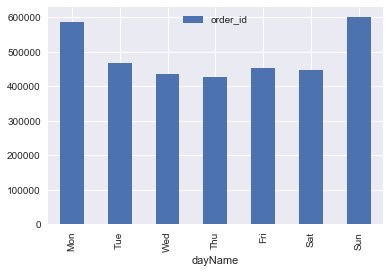

In [53]:
days = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'} #dictionary of numeric day:Alpha day
week = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun']

a = dfOrders #set new df equal to orders df
a['dayName']=a['order_dow'].apply(lambda x: days[x]) #create new column 'dayName' compare' order_dow' to dictionary
a = a.groupby(['dayName'])[['order_id']].count().reindex(week).plot.bar() #group the orders by dayName


# Hourly Shopping Profile

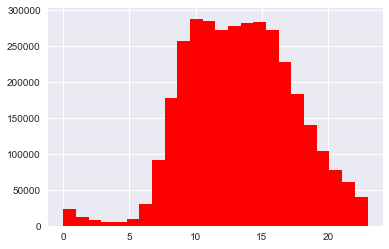

In [54]:
dfOrders['order_hour_of_day'].hist(bins=24,color='red')

In [55]:
dfOrders['order_hour_of_day'].describe()

count    3.421083e+06
mean     1.345202e+01
std      4.226088e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

# Days Since Prior Order

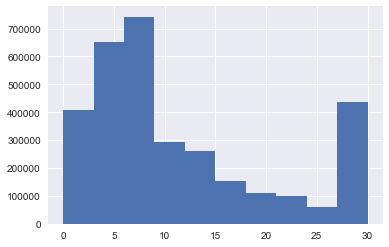

In [56]:
dfOrders['days_since_prior_order'].hist()
#what is going on with the spike?

In [57]:
dfOrders['days_since_prior_order'].describe()

count    3.214874e+06
mean     1.111484e+01
std      9.206737e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

# #of days since prior order dataframe

Filling in empty cells with the mean

In [58]:

e=dfOrders[['order_dow','order_hour_of_day','days_since_prior_order']]
e=e.fillna(value=e['days_since_prior_order'].mean())
e.set_index(['order_dow','order_hour_of_day'],append=True)
e.head()


,order_dow,order_hour_of_day,days_since_prior_order
0,2,8,11.114836
1,3,7,15.000000
2,3,12,21.000000
3,4,7,29.000000
4,4,15,28.000000


info about this area

In [59]:
e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 3 columns):
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(2)
memory usage: 78.3 MB


# The Qty of Purchases per Department

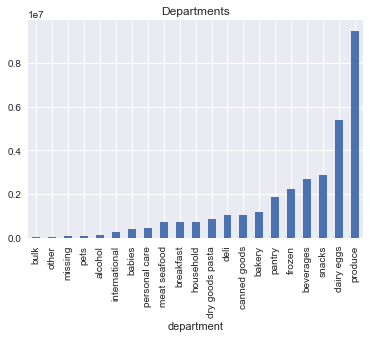

In [60]:
dfFun = dfOrdersPrior.merge(dfShelves) #combine the prior orders & shelf contents
a=dfFun.groupby(['department']).size().sort_values() #groupby department
a.plot(kind='bar',title='Departments')
#determine how to plot the biggest 25 departments on a bar chart
#shows the most popular departments

# Department by Volume of Products

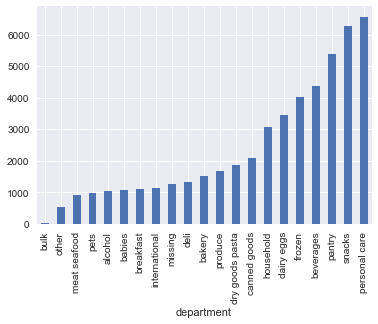

In [61]:
ProductVolume= dfShelves.groupby(['department']).size().sort_values()
ProductVolume.plot(kind='bar')

# Making of a Master Dataset Including %reordered

In [62]:
dfreOrder = dfShelves.merge(dfOrdersPrior)
dfreOrder.head(5)
#merge to include all shelves(dept/aisle/product) info with prior orders


,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered
0,25773,#2 Coffee Filters,26,7,coffee,beverages,10427,1,1
1,25773,#2 Coffee Filters,26,7,coffee,beverages,11996,3,0
2,25773,#2 Coffee Filters,26,7,coffee,beverages,20770,3,0
3,25773,#2 Coffee Filters,26,7,coffee,beverages,22531,18,0
4,25773,#2 Coffee Filters,26,7,coffee,beverages,23489,5,1


In [63]:
#tried to aggregate and then use lambda to create df with department_id and repeat orders as a % of their sum of occurences
#ideally be able to produce same stats for aisle and product, then plot %reorder vs purchase count
#as a scatter plot of the aisle/product/department
dfreOrderSum = dfreOrder.groupby(['department_id']).agg({'reordered':'count'})
dfreOrderPcts = dfreOrderSum.apply(lambda x: 100*x/float(x.sum()))
dfreOrderPcts = dfreOrderPcts.reset_index()
dfreOrderPcts=dfreOrderPcts.rename(columns={'reordered':'%reordered'})
dfreOrderPcts.head()


,department_id,%reordered
0,1,6.895228
1,2,0.111890
2,3,3.628197
3,4,29.225961
4,5,0.473866


In [64]:
#merge with prior orders dataset
dfNew = dfreOrder.merge(dfreOrderPcts,on='department_id')
dfNew.sort_values('%reordered',ascending=False).head(1)


,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,%reordered
20470985,7628,"Dressing, Jersey Sweet Onion, Calorie Free",83,4,fresh vegetables,produce,2024242,28,0,29.225961


In [65]:
dfDept1 = dfDept.merge(dfreOrderPcts)
dfDept1.head()

,department_id,department,%reordered
0,1,frozen,6.895228
1,2,other,0.111890
2,3,bakery,3.628197
3,4,produce,29.225961
4,5,alcohol,0.473866


# The most often reordered department is Produce

In [66]:
dfDeptList= dfDept1[['department','%reordered']]
dfDeptList=dfDeptList.sort_values('%reordered',ascending=False)
dfDeptList = dfDeptList['department']

dfDeptList=dfDeptList.tolist()

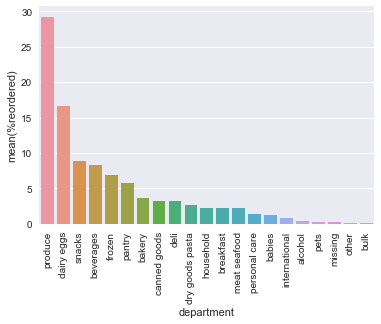

In [67]:
#barplot of the %reordered by department...would like to order these by ascending values.
plot = sns.barplot(x='department',y='%reordered',data=dfDept1,order=dfDeptList)
for item in plot.get_xticklabels():
    item.set_rotation(90)

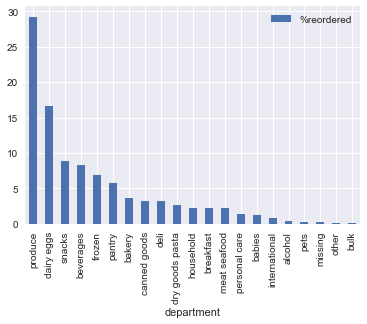

In [68]:
dfDept1.groupby(['department'])[['%reordered']].mean().reindex(dfDeptList).plot.bar()

In [69]:
dfreOrderSumbyProd = dfreOrder.groupby(['product_id']).agg({'reordered':'count'})
dfreOrderPctsbyProd = dfreOrderSumbyProd.apply(lambda x: 100*x/float(x.sum()))
dfreOrderPctsbyProd = dfreOrderPctsbyProd.reset_index()
dfreOrderPctsbyProd=dfreOrderPctsbyProd.rename(columns={'reordered':'%reordered'})
dfreOrderPctsbyProd.sort_values(by='%reordered',ascending=False)
#dfreOrderSumbyProd.head()

,product_id,%reordered
24848,24852,1.456983
13172,13176,1.169897
21133,21137,0.816054
21899,21903,0.745876
47198,47209,0.658509
47755,47766,0.545145
47615,47626,0.470663
16793,16797,0.440738
26204,26209,0.433572
27839,27845,0.425180


In [70]:
dfProd1 = dfProd.merge(dfreOrderPctsbyProd)
dfProd1.head()

,product_id,product_name,aisle_id,department_id,%reordered
0,1,Chocolate Sandwich Cookies,61,19,0.005710
1,2,All-Seasons Salt,104,13,0.000277
2,3,Robust Golden Unsweetened Oolong Tea,94,7,0.000854
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,0.001014
4,5,Green Chile Anytime Sauce,5,13,0.000046


How Many Prior Orders are there?

In [71]:
dfOrders.eval_set.value_counts()


prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

How many Items do people usually buy?

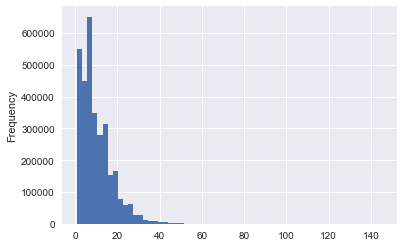

In [72]:
dfQtyBought = dfOrdersPrior.groupby(['order_id']).last()
dfQtyBought.reset_index()
dfQty = dfQtyBought['add_to_cart_order']
dfQty.plot.hist(bins=60)

In [73]:
dfQty.describe()

count    3.214874e+06
mean     1.008888e+01
std      7.525398e+00
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.400000e+01
max      1.450000e+02
Name: add_to_cart_order, dtype: float64

The average purchase is 10 items

In [74]:
dfProd1.sort_values('%reordered',ascending=False).head(10)
#the most often orderd product is the humble Banana

,product_id,product_name,aisle_id,department_id,%reordered
24848,24852,Banana,24,4,1.456983
13172,13176,Bag of Organic Bananas,24,4,1.169897
21133,21137,Organic Strawberries,24,4,0.816054
21899,21903,Organic Baby Spinach,123,4,0.745876
47198,47209,Organic Hass Avocado,24,4,0.658509
47755,47766,Organic Avocado,24,4,0.545145
47615,47626,Large Lemon,24,4,0.470663
16793,16797,Strawberries,24,4,0.440738
26204,26209,Limes,24,4,0.433572
27839,27845,Organic Whole Milk,84,16,0.425180
